<a href="https://colab.research.google.com/github/aarushi-nema/nvidia_deeplearning_workshop_exercises/blob/main/Ex01_Image_Classification_with_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST database is a collection of 70,000 greyscale images of handwritten digits from 0 to 9.<br><br>
We will be using matplotlib to render the greyscale image. 

In [ ]:
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist <br>
mnist.load_data(): <br>
Returns a tuple of NumPy arrays: (x_train, y_train), (x_test, y_test). <br> <br>
x_train: Contains the images used to train the neural network. It is a uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.<br>

y_train:  Correct labels for the x_train images, used to evaluate the model's predictions during training. It is a uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.<br>

x_test: Images set aside for validating the performance of the model after it has been trained. It is a uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255. <br>

y_test:  Correct labels for the x_valid images, used to evaluate the model's predictions after it has been trained. It is a uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.<br>

In [ ]:
#splitting the data between training data and validation data
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Keras has partitioned 60,000 (out of a total 70,000) images for training. Also each image is a 28X28 2D array.
x_train.shape

(60000, 28, 28)

In [ ]:
#Keras has partitioned 10,000 (out of a total 70,000) images for validation. Also each image is a 28x28 2D array.
x_valid.shape

(10000, 28, 28)

In [ ]:
type(x_train)

numpy.ndarray

The 28x28 images are presented as a collection of unsigned 8-bit integer values between 0 and 255

In [ ]:
# .dtype gives the data type of each element in the numpy array
x_train.dtype

dtype('uint8')

In [ ]:
# .min() gives the minimum value in the x_train array
x_train.min()

0

In [ ]:
# .max() gives the maximum value in the x_train array
x_train.max()

255

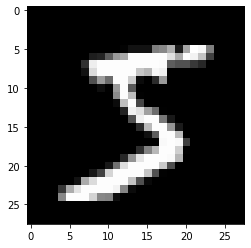

In [ ]:
#Let us render one of the images from x_train
image = x_train[0]
plt.imshow(image, cmap='gray')

In [ ]:
#Let us see what label the above image is assigned (i.e which number it is)
y_train[0]

5

# Preparing the data for training

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:

<ol>
  <li>Flatten the image data, to simplify the image input into the model</li>
  <li>Normalize the image data, to make the image input values easier to work with for the model</li>
  <li>Categorize the labels, to make the label values easier to work with for the model</li>
</o1>


### Flatten the data


Flattening the image basically means that we will convert the 28x28 2D array to a 1D array containing 784 elements (note: 28x28 = 784)
. <br>


In [ ]:
x_train = x_train.reshape(60000, 784)

In [ ]:
x_valid = x_valid.reshape(10000, 784)

In [ ]:
#Let us confirm whether the numpy array have been reshaped
x_train.shape

(60000, 784)

In [ ]:
#This is what each element of the the numpy array would look like
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

###Normalizing the data

Deep learning models work better with floating point numbers between 0 and 1. The convertion of integers to floating point numbers between 0 and 1 is called normalization.

In [ ]:
x_train = x_train/255
x_valid = x_valid/255

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

###Categorical Encoding

In [ ]:
#Since we have digits ranging from 0-9 there are 10 possible categories
number_classes = 10

#Now we will categorically encode the Y numpy arrays using the keras api
y_train = keras.utils.to_categorical(y_train, number_classes)
y_valid = keras.utils.to_categorical(y_valid, number_classes)

In [ ]:
#Here are the correct answers for the first 10 images
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#Creating the model

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several layers and will be comprised of 3 main parts:



1.   An input layer, which will receive data in some expected format
2.   Several hidden layers, each comprised of many neurons. Each neuron will have the ability to affect the network's guess with its weights, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image





###Instantiating the model

To begin, we will use Keras's Sequential model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [ ]:
model = Sequential()

###Creating the input layer

Next, we will add the input layer. This layer will be densely connected, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. <br>
The units argument specifies the number of neurons in the layer.
We will use the relu activation function, which in short, will help our network
to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function. The input_shape value specifies the shape of the incoming data which in our situation is a 1D array of 784 values:

In [ ]:
#We will now use the Keras Dense layer api to make the input layer
model.add(Dense(units = 512, activation= 'relu', input_shape= (784,)))

###Creating the hidden layers

In [ ]:
#We will add another dense layer with with 512 neurons(units) and with relu activation function
model.add(Dense(units=512, activation='relu'))

###Creating the output layer

Finally, we will add the output layer to our model. Here we will make use of the Dense layer again but we will change our activation function to 'softmax.'
<br>
Softmax will result in the layers values being a probability between 0 and 1. It will result the outputs to add upto 1. 
<br>
In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class: 

In [ ]:
model.add(Dense(units=10, activation='softmax'))

###Summarizing the model


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


###Compiling the model

In [ ]:
#Here we will compile the model that we've made. While compiling we indicate the loss function we want to use and the metrics we want to track when training the model.
model.compile(loss='categorical_crossentropy', metrics= ['accuracy'])

#Training the model

Armed with our prepared training and validation data and the model, we can now train the model.
<br><br>
"Training a model with data" is synonymus with "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.<br>
 

When fitting (training) a model with Keras, we use the model's fit method. It expects the following arguments:



1. The training data
2. The labels for the training data
3. The number of times it should train on the entire training dataset (called an epoch)
4. The validation or test data, and its labels







In [ ]:
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1949 - accuracy: 0.9427 - val_loss: 0.1023 - val_accuracy: 0.9717
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1015 - accuracy: 0.9735 - val_loss: 0.1018 - val_accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0838 - accuracy: 0.9803 - val_loss: 0.1185 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0718 - accuracy: 0.9836 - val_loss: 0.1167 - val_accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0655 - accuracy: 0.9859 - val_loss: 0.1424 - val_accuracy: 0.9792


#Observing the accuracy

For each of the 5 epochs, notice the accuracy and val_accuracy scores. accuracy states how well the model did for the epoch on all the training data. val_accuracy states how well the model did on the validation data, which if you recall, was not used at all for training the model.

The model did quite well! The accuracy quickly reached close to 100%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.